
Assignment_Name: Multi layer Perceptron_MNIST


Group Members:
Roshan Rayala Bhaskar,
Shashank Mysore Girish

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/IDL")

**Loading the libraries**

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

**Split the Dataset into Train and test and reshape it**

In [4]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

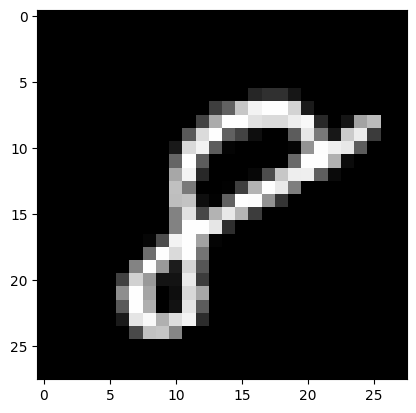

8


In [7]:
# Display an example image and label
plt.imshow(train_images[59999], cmap= 'gray')
plt.show()
print(train_labels[59999])

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
# Flatten the images and create MNISTDataset
data = MNISTDataset(train_images.reshape([-1, 28*28]), train_labels,
                    test_images.reshape([-1, 28*28]), test_labels,
                    batch_size=128)

In [10]:
# Define the Multilayer Perceptron (MLP) model
W1 = tf.Variable(tf.random.uniform([28*28, 128], minval=-0.1, maxval=0.1))
b1 = tf.Variable(tf.zeros(128, dtype=tf.float32))

W2 = tf.Variable(tf.random.uniform([128, 32], minval=-0.1, maxval=0.1))
b2 = tf.Variable(tf.zeros(32, dtype=tf.float32))

W3 = tf.Variable(tf.random.uniform([32, 10], minval=-0.1, maxval=0.1))
b3 = tf.Variable(tf.zeros(10, dtype=tf.float32))

weights = [W1, b1, W2, b2, W3, b3]

In [13]:
def mlp_model(inputs):
    hidden_layer1 = tf.nn.relu(tf.matmul(inputs, W1) + b1)
    hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, W2) + b2)
    return tf.matmul(hidden_layer2, W3) + b3

def get_accuracy(labels, outputs):
    predictions = tf.argmax(outputs, axis=1, output_type=tf.int32)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

In [14]:
train_steps = 2000
learning_rate = 0.1

In [15]:
# Training loop for the MLP model
for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape() as tape:
        logits = mlp_model(image_batch)
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(label_batch, depth=10), logits=logits))


    grads = tape.gradient(cross_entropy, weights)
    for w, g in zip(weights, grads):
        w.assign_sub(learning_rate * g)

    # Print loss and accuracy every 100 steps
    if not step % 100:
        accuracy = get_accuracy(label_batch, logits)
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, cross_entropy, accuracy))

        test_logits = mlp_model(data.test_data)
        test_accuracy = get_accuracy(data.test_labels, test_logits)
        print("Test accuracy: {}".format(test_accuracy))

Step 1. Batch loss: 2.296704053878784 Batch accuracy: 0.1328125
Test accuracy: 0.1347000002861023
Step 101. Batch loss: 0.9467358589172363 Batch accuracy: 0.6484375
Test accuracy: 0.7609000205993652
Step 201. Batch loss: 0.5003258585929871 Batch accuracy: 0.859375
Test accuracy: 0.8543999791145325
Step 301. Batch loss: 0.4446319043636322 Batch accuracy: 0.84375
Test accuracy: 0.899399995803833
Step 401. Batch loss: 0.4784253239631653 Batch accuracy: 0.8359375
Test accuracy: 0.9027000069618225
Starting new epoch...
Step 501. Batch loss: 0.33963239192962646 Batch accuracy: 0.875
Test accuracy: 0.9115999937057495
Step 601. Batch loss: 0.3285508155822754 Batch accuracy: 0.890625
Test accuracy: 0.9121999740600586
Step 701. Batch loss: 0.3992699980735779 Batch accuracy: 0.8671875
Test accuracy: 0.9276999831199646
Step 801. Batch loss: 0.3240527808666229 Batch accuracy: 0.8984375
Test accuracy: 0.9296000003814697
Step 901. Batch loss: 0.40038979053497314 Batch accuracy: 0.9140625
Test accurac

In [16]:
test_predictions = tf.argmax(mlp_model(data.test_data), axis=1,
                       output_type=tf.int32)
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),
                             tf.float32))
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.955299973487854


Step 1. Batch loss: 0.0812380313873291 Batch accuracy: 0.9609375
Test accuracy: 0.9571999907493591
Step 101. Batch loss: 0.1759885847568512 Batch accuracy: 0.9453125
Test accuracy: 0.9602000117301941
Step 201. Batch loss: 0.14607882499694824 Batch accuracy: 0.96875
Test accuracy: 0.9599999785423279
Step 301. Batch loss: 0.13645555078983307 Batch accuracy: 0.9609375
Test accuracy: 0.9585999846458435
Starting new epoch...
Step 401. Batch loss: 0.1736949235200882 Batch accuracy: 0.9609375
Test accuracy: 0.9638000130653381
Step 501. Batch loss: 0.11137546598911285 Batch accuracy: 0.9765625
Test accuracy: 0.9628000259399414
Step 601. Batch loss: 0.09192082285881042 Batch accuracy: 0.96875
Test accuracy: 0.9639000296592712
Step 701. Batch loss: 0.1377602368593216 Batch accuracy: 0.96875
Test accuracy: 0.9671000242233276
Step 801. Batch loss: 0.08545713871717453 Batch accuracy: 0.96875
Test accuracy: 0.9670000076293945
Starting new epoch...
Step 901. Batch loss: 0.10401977598667145 Batch accu

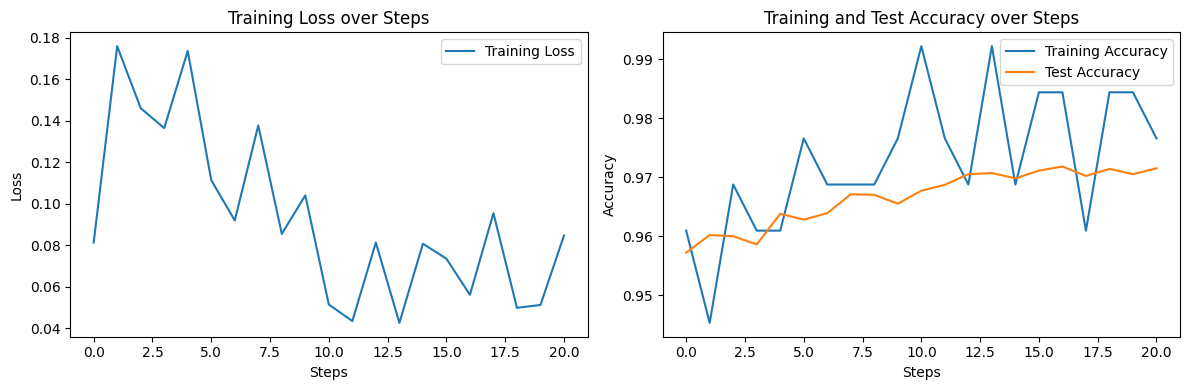

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf  # Assuming you have TensorFlow imported

train_steps = 2000
learning_rate = 0.1

# Lists to store performance metrics for visualization
train_losses = []
train_accuracies = []
test_accuracies = []

# Training loop for the MLP model
for step in range(train_steps + 1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape() as tape:
        logits = mlp_model(image_batch)
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(label_batch, depth=10), logits=logits))

    grads = tape.gradient(cross_entropy, weights)
    for w, g in zip(weights, grads):
        w.assign_sub(learning_rate * g)

    # Print loss and accuracy every 100 steps
    if not step % 100:
        accuracy = get_accuracy(label_batch, logits)
        train_losses.append(cross_entropy.numpy())
        train_accuracies.append(accuracy.numpy())

        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, cross_entropy, accuracy))

        test_logits = mlp_model(data.test_data)
        test_accuracy = get_accuracy(data.test_labels, test_logits)
        test_accuracies.append(test_accuracy.numpy())
        print("Test accuracy: {}".format(test_accuracy))

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss over Steps')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Training and Test Accuracy over Steps')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


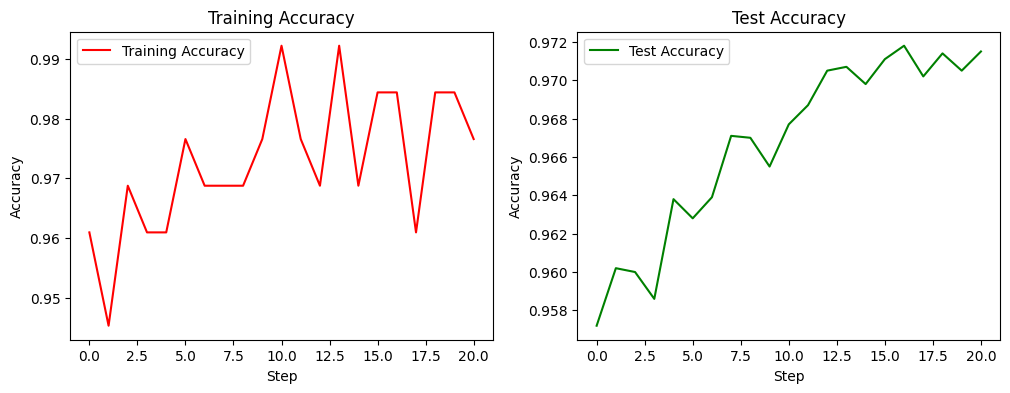

In [18]:
# Plotting training and test accuracy
plt.figure(figsize=(12, 4))

# Plotting training accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy', color='red')
plt.title('Training Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()

# Plotting test accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
